In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# afficher les dataframes complets
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
ose_2015 = pd.read_csv('ose_2015.csv')
ose_2016 = pd.read_csv('ose_2016.csv')

In [4]:
inputs_nominal = ['BuildingType', 'PrimaryPropertyType', 'ZipCode', 'CouncilDistrictCode', 'Neighborhood',\
                  'LargestPropertyUseType', 'SecondLargestPropertyUseType',\
                  'ThirdLargestPropertyUseType']
inputs_ordinal = ['YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',\
                 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',\
                 'ThirdLargestPropertyUseTypeGFA']

outputs_ordinal = ['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',\
                   'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',\
                  'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity']

In [5]:
ose_2016.Outlier

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
30     NaN
31     NaN
32     NaN
33     NaN
34     NaN
35     NaN
36     NaN
37     NaN
38     NaN
39     NaN
40     NaN
41     NaN
42     NaN
43     NaN
44     NaN
45     NaN
46     NaN
47     NaN
48     NaN
49     NaN
50     NaN
51     NaN
52     NaN
53     NaN
54     NaN
55     NaN
56     NaN
57     NaN
58     NaN
59     NaN
60     NaN
61     NaN
62     NaN
63     NaN
64     NaN
65     NaN
66     NaN
67     NaN
68     NaN
69     NaN
70     NaN
71     NaN
72     NaN
73     NaN
74     NaN
75     NaN
76     NaN
77     NaN
78     NaN
79     NaN
80     NaN
81     NaN
82     NaN
83     NaN
84     NaN
85     NaN
86     NaN
87     NaN
88     NaN
89     NaN
90     NaN

# LES MODELES

In [6]:
ose_2016.tail(1)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
2672,50059,2016,Multifamily LR (1-4),Low-Rise Multifamily,Wedgewood Estates Building B,Seattle,WA,98115.0,6392001040,4,NORTHEAST,47.6843,-122.28772,1981,1.0,4,53100,0,53100,"Multifamily Housing, Parking",Multifamily Housing,32007.0,Parking,20754.0,None,0.0,NaN,70.0,30.200001,32.0,94.800003,100.5,966812.125,1024886.688,0.0,283356.4063,966812.0,0.0,0.0,False,NaN,Compliant,NaN,6.74,0.13


## Préparation du jeu de données train , test

In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import KFold, train_test_split

ose_id = ose_2016.copy()

inputs_scaled_ordinal = MinMaxScaler(feature_range=(0,1)).fit_transform(ose_id[inputs_ordinal])
outputs_scaled_ordinal = MinMaxScaler(feature_range=(0,1)).fit_transform(ose_id[outputs_ordinal])

inputs_ordinal_2016 = pd.DataFrame(inputs_scaled_ordinal, columns=inputs_ordinal)
outputs_ordinal_2016 = pd.DataFrame(outputs_scaled_ordinal, columns=outputs_ordinal)

set_2016 = pd.DataFrame()
set_2016[inputs_ordinal] = inputs_ordinal_2016[inputs_ordinal].copy()
set_2016[inputs_nominal] = ose_id[inputs_nominal].copy()
set_2016[outputs_ordinal] = outputs_ordinal_2016[outputs_ordinal].copy()

x_train, x_test, y_train, y_test = train_test_split(set_2016[inputs_ordinal+inputs_nominal], set_2016[outputs_ordinal], test_size=0.2)

In [8]:
set_2016.head()

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,BuildingType,PrimaryPropertyType,ZipCode,CouncilDistrictCode,Neighborhood,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,0.236842,0.037037,0.121212,0.043160,0.000000,0.048685,0.052381,0.000000,0.000000,NonResidential,Hotel,98101.0,7,DOWNTOWN,Hotel,None,None,0.255632,0.257641,0.189689,0.199874,0.099554,0.100855,0.064578,0.065179,0.036801,0.097407,0.190508
1,0.842105,0.037037,0.111111,0.052704,0.029387,0.048728,0.049499,0.034333,0.015208,NonResidential,Hotel,98101.0,7,DOWNTOWN,Hotel,Parking,Restaurant,0.296621,0.299205,0.183037,0.189834,0.115557,0.117187,0.000000,0.053894,0.148336,0.115228,0.192513
2,0.605263,0.037037,0.414141,0.590390,0.383759,0.472946,0.475122,0.000000,0.000000,NonResidential,Hotel,98101.0,7,DOWNTOWN,Hotel,None,None,0.300375,0.298594,0.251429,0.257504,1.000000,1.000000,0.695018,0.796662,0.043067,0.811823,0.147727
3,0.228070,0.037037,0.101010,0.026060,0.000000,0.031540,0.035224,0.000000,0.000000,NonResidential,Hotel,98101.0,7,DOWNTOWN,Hotel,None,None,0.346683,0.346271,0.224717,0.236482,0.093606,0.093956,0.071364,0.046288,0.052218,0.111565,0.313503
4,0.701754,0.037037,0.181818,0.098122,0.120950,0.064585,0.074536,0.155004,0.000000,NonResidential,Hotel,98121.0,7,DOWNTOWN,Hotel,Parking,Swimming Pool,0.359199,0.362775,0.219728,0.227696,0.195250,0.198229,0.000000,0.088008,0.253825,0.196465,0.193850


## Modèles linéaires

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [10]:
def linear_regression_model(x_train_init, x_test_init, y_train_init, y_test_init, tested_features=[], main_features=[], outputs=[]):

    df_r2 = pd.DataFrame()
    
    for elem in main_features:
        tested_features.remove(elem)
    
    for i, col in enumerate(tested_features):
        inputs = [col]
        if len(main_features) > 0:
            inputs += main_features

        # Training and testing set
        x_train, x_test, y_train, y_test = x_train_init[inputs].copy(), x_test_init[inputs].copy(), y_train_init[outputs].copy(), y_test_init[outputs].copy()
    
        # Search best Cross validation fit
        model = LinearRegression()
        parameters = {'fit_intercept':[True,False], 
                      'normalize':[True,False], 
                      'copy_X':[True, False]}
        clf = GridSearchCV(model, parameters, cv=10) 
        clf.fit(x_train, y_train)

        # Indicators 
        y_pred = clf.predict(x_test)
        rmse = np.sqrt(np.sum((y_pred - y_test) ** 2) / len(y_pred))
        r2 = metrics.r2_score(y_test, y_pred)
        r2_error = max(clf.cv_results_['std_test_score'])
        y_pred_positive = np.where(y_pred > -1, y_pred, 0)
        y_test_positive = np.where(y_test > -1, y_test, 0)
        rmsle = np.sqrt(np.sum((np.log(y_pred_positive + 1) \
                             - np.log(y_test_positive + 1)) ** 2) / len(y_pred))

        # Pandas results
        df_r2.loc[i, "Features"] = col
        df_r2.loc[i, "r2"] = round(r2, 2)
        df_r2.loc[i, "r2 error"] = round(r2_error, 2)
        df_r2.loc[i, "RMSE (Normalized)"] = round(rmse.values[0], 4)
        df_r2.loc[i, "RMSLE"] = round(rmsle, 4)
        df_r2.loc[i, "Train score"] = round(metrics.r2_score(y_train, clf.predict(x_train)), 2)
        

    return df_r2.sort_values("r2", ascending=False).reset_index().drop("index", axis=1), clf

## 1 input ordinal

In [11]:
df_res, clf_res = linear_regression_model(x_train, x_test, y_train, y_test, tested_features=inputs_ordinal[:], main_features=[], outputs=['SiteEnergyUse(kBtu)'])

In [12]:
df_res

,Features,r2,r2 error,RMSE (Normalized),RMSLE,Train score
0,PropertyGFATotal,0.68,0.11,0.0629,0.0475,0.49
1,PropertyGFABuilding(s),0.67,0.13,0.0644,0.0488,0.45
2,LargestPropertyUseTypeGFA,0.65,0.10,0.0666,0.0501,0.46
3,SecondLargestPropertyUseTypeGFA,0.39,0.19,0.0874,0.0672,-1.02
4,NumberofFloors,0.37,0.38,0.0890,0.0688,-2.49
5,PropertyGFAParking,0.28,0.22,0.0949,0.0727,-1.83
6,ThirdLargestPropertyUseTypeGFA,0.15,0.25,0.1032,0.0795,-4.13
7,YearBuilt,0.02,0.05,0.1107,0.0860,-63.92
8,NumberofBuildings,-0.02,0.09,0.1128,0.0878,-24.48


In [13]:
clf_res.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': False}

On observe que les 3 premières features présentent de bien meilleurs résultats que les autres.
Ces features semblent à priori assez corrélées, il s'agit des surfaces GFA totales, de l'usage principale et des batiments.

On décide de conserver la plus corrélée, PropertyGFATotal, et de tester le modèle linéaire en ajoutant des features.

## 2 inputs ordinaux

In [14]:
df_res, clf_res = linear_regression_model(x_train, x_test, y_train, y_test, tested_features=inputs_ordinal[:], main_features=['PropertyGFATotal'], outputs=['SiteEnergyUse(kBtu)'])

In [15]:
df_res

,Features,r2,r2 error,RMSE (Normalized),RMSLE,Train score
0,YearBuilt,0.68,0.11,0.0629,0.0474,0.50
1,NumberofFloors,0.68,0.11,0.0629,0.0474,0.49
2,PropertyGFAParking,0.68,0.12,0.0628,0.0474,0.50
3,PropertyGFABuilding(s),0.68,0.12,0.0628,0.0474,0.50
4,LargestPropertyUseTypeGFA,0.68,0.10,0.0634,0.0478,0.50
5,SecondLargestPropertyUseTypeGFA,0.68,0.10,0.0631,0.0477,0.51
6,ThirdLargestPropertyUseTypeGFA,0.68,0.11,0.0629,0.0474,0.49
7,NumberofBuildings,0.67,0.11,0.0637,0.0482,0.52


On remarque que l'ajout d'une feature à ce modèle n'améliore que très peu son pouvoir de prédiction.

In [16]:
linear_regression_model(x_train, x_test, y_train, y_test, tested_features=inputs_ordinal[:], main_features=['PropertyGFATotal', 'NumberofBuildings'], outputs=['SiteEnergyUse(kBtu)'])

(                          Features    r2  r2 error  RMSE (Normalized)   RMSLE  \
 0                        YearBuilt  0.68      0.11             0.0637  0.0482   
 1               PropertyGFAParking  0.68      0.11             0.0636  0.0482   
 2           PropertyGFABuilding(s)  0.68      0.11             0.0636  0.0482   
 3   ThirdLargestPropertyUseTypeGFA  0.68      0.11             0.0637  0.0482   
 4                   NumberofFloors  0.67      0.11             0.0638  0.0482   
 5        LargestPropertyUseTypeGFA  0.67      0.10             0.0642  0.0485   
 6  SecondLargestPropertyUseTypeGFA  0.67      0.10             0.0637  0.0483   
 
    Train score  
 0         0.52  
 1         0.52  
 2         0.52  
 3         0.52  
 4         0.52  
 5         0.54  
 6         0.53  ,
 GridSearchCV(cv=10, estimator=LinearRegression(),
              param_grid={'copy_X': [True, False],
                          'fit_intercept': [True, False],
                          'normalize'

Idem pour l'ajout d'une troisième feature.

Notre modèle linéaire le plus efficace est donc le modèle avec pour features LargestPropertyUseTypeGFA, NumberofBuildings
et YearBuilt.
En revanche, on peut se questionner sur la pertinence de le modèle comparé au modèle à une unique feature PropertyGFATotal
qui fournit un score de prédiction quasi identique.

# Régression Ridge

In [17]:
from sklearn.linear_model import Ridge

baseline_error = 0.6

mean_coefs = []
mean_r2= []
mean_rmse = []

# inputs : 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType'
#          'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA'
#
#          'PropertyGFATotal'
#
# outputs : 'SiteEnergyUse(kBtu)'

inputs = inputs_ordinal
outputs=['SiteEnergyUse(kBtu)']

cv = KFold(10)
cv_set = cv.split(X=set_2016[inputs+outputs])

alphas = np.logspace(-5, 5, 200)

for a in alphas:
    
    r2 = []
    coefs = []
    rmse = []
    
    cv = KFold(10)
    cv_set = cv.split(X=set_2016[inputs+outputs])
    
    for train_index, test_index in cv_set:

        x_train, x_test, y_train, y_test = set_2016.loc[train_index, inputs], set_2016.loc[test_index,inputs],\
                                                set_2016.loc[train_index,outputs], set_2016.loc[test_index,outputs]


        lr = Ridge(alpha=a, copy_X= True, fit_intercept= True, normalize= True)
        lr = lr.fit(x_train, y_train)
        y_pred = lr.predict(x_test)

        rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
        r2.append(metrics.r2_score(y_test, y_pred))
        coefs.append(lr.coef_[0])
        
    mean_coefs.append(np.mean(coefs, axis=0))
    mean_r2.append([baseline_error, np.mean(r2)])
    mean_rmse.append(np.mean(rmse, axis=0))

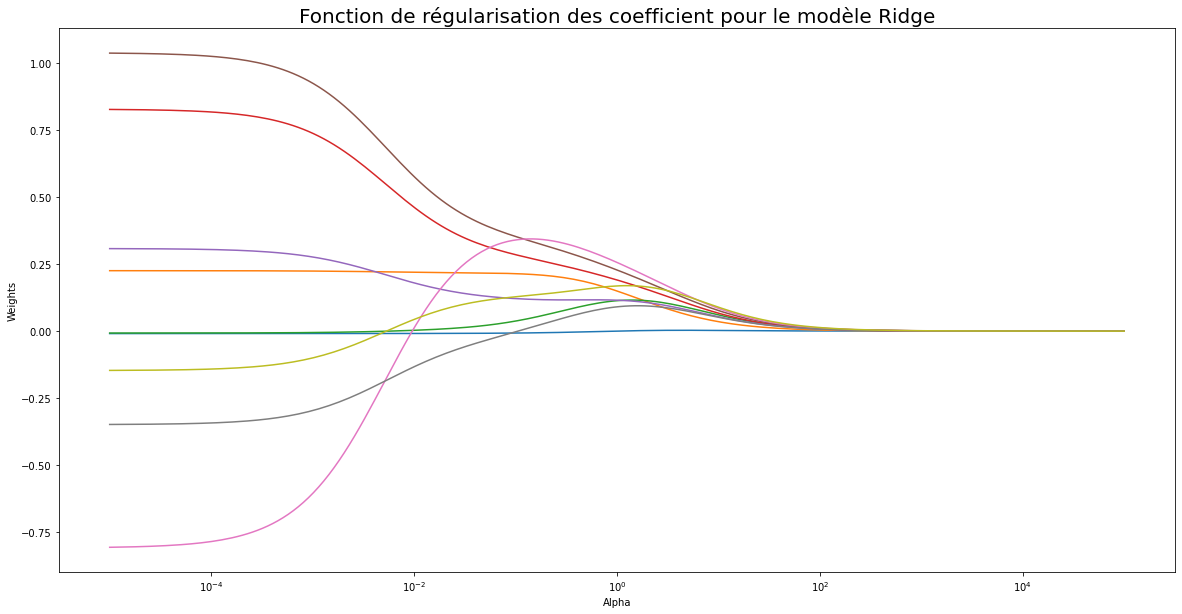

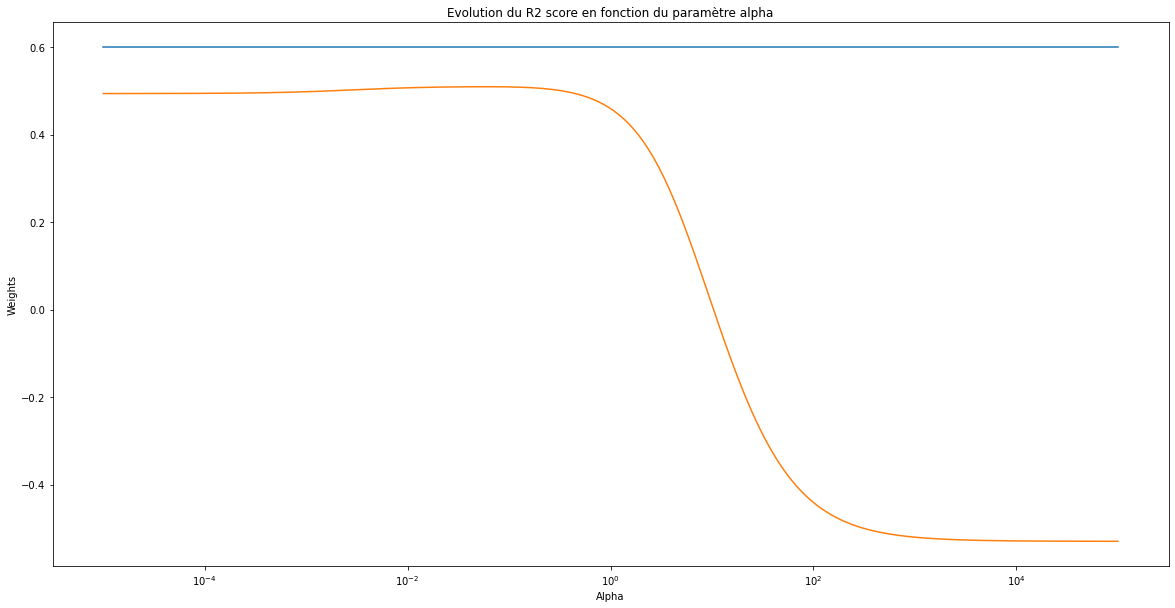

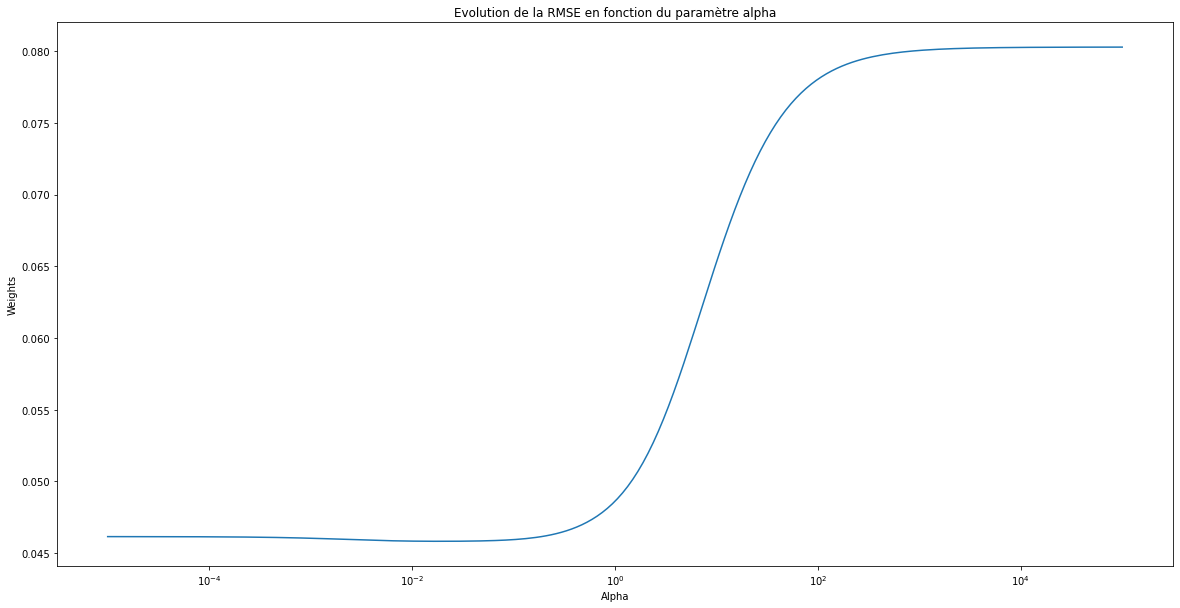

La régresison Ridge la plus performante est atteinte avec le coefficient alpha =  0.05872786613189483  avec un r2_score = 0.5094704284899663


In [18]:
plt.figure(figsize=(20,10))
plt.title('Fonction de régularisation des coefficient pour le modèle Ridge', size=20)
plt.plot(alphas, mean_coefs)
plt.xlabel('Alpha')
plt.xscale('log')
plt.ylabel('Weights')
plt.show()

plt.figure(figsize=(20,10))
plt.title('Evolution du R2 score en fonction du paramètre alpha')
plt.plot(alphas, mean_r2)
plt.xlabel('Alpha')
plt.xscale('log')
plt.ylabel('Weights')
plt.show()

plt.figure(figsize=(20,10))
plt.title('Evolution de la RMSE en fonction du paramètre alpha')
plt.plot(alphas, mean_rmse)
plt.xlabel('Alpha')
plt.xscale('log')
plt.ylabel('Weights')
plt.show()

r2_max = max(np.array(mean_r2)[:,1])
best_alpha = alphas[np.argmax(np.array(mean_r2)[:,1])]
print("La régresison Ridge la plus performante est atteinte avec le coefficient alpha = ",best_alpha, " avec un r2_score =", r2_max)

# Régression Lasso

In [19]:
from sklearn.linear_model import Lasso

baseline_error = 0.6

mean_coefs = []
mean_r2= []
mean_rmse = []

# inputs : 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType'
#          'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA'
#
#          'PropertyGFATotal'
#
# outputs : 'SiteEnergyUse(kBtu)'

inputs = inputs_ordinal
outputs=['SiteEnergyUse(kBtu)']

cv = KFold(10)
cv_set = cv.split(X=set_2016[inputs+outputs])

alphas = np.logspace(-5, 5, 200)

for a in alphas:
    
    r2 = []
    coefs = []
    rmse = []
    
    cv = KFold(10)
    cv_set = cv.split(X=set_2016[inputs+outputs])
    
    for train_index, test_index in cv_set:

        x_train, x_test, y_train, y_test = set_2016.loc[train_index, inputs], set_2016.loc[test_index,inputs],\
                                                set_2016.loc[train_index,outputs], set_2016.loc[test_index,outputs]


        lr = Lasso(alpha=a)
        lr = lr.fit(x_train, y_train)
        y_pred = lr.predict(x_test)

        rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
        r2.append(metrics.r2_score(y_test, y_pred))
        coefs.append(lr.coef_)
        
    mean_coefs.append(np.mean(coefs, axis=0))
    mean_r2.append([baseline_error, np.mean(r2)])
    mean_rmse.append(np.mean(rmse, axis=0))

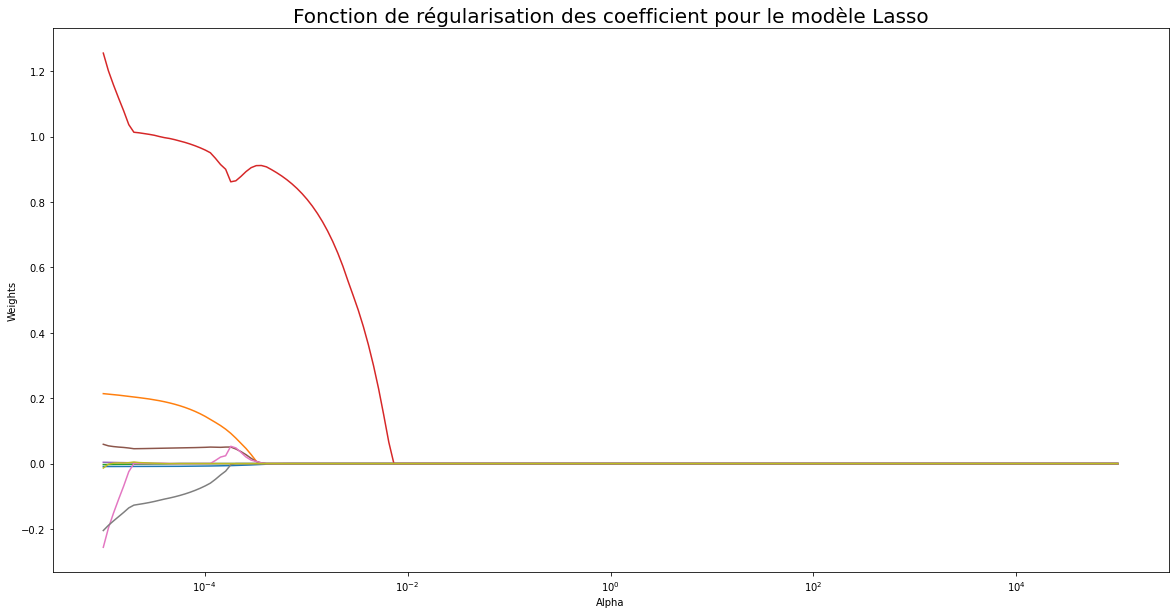

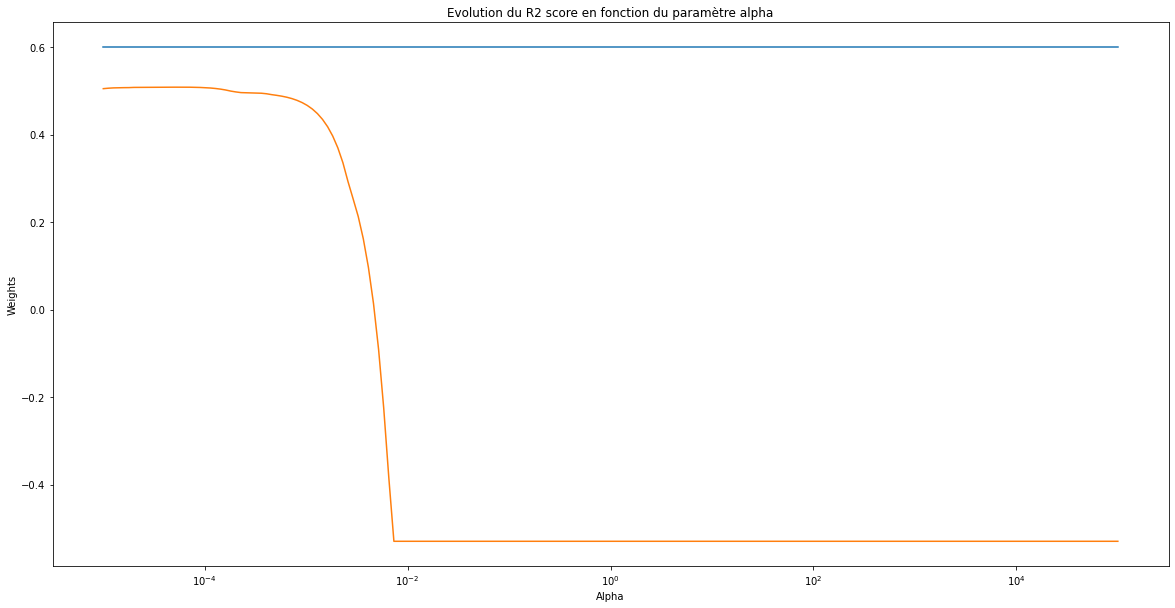

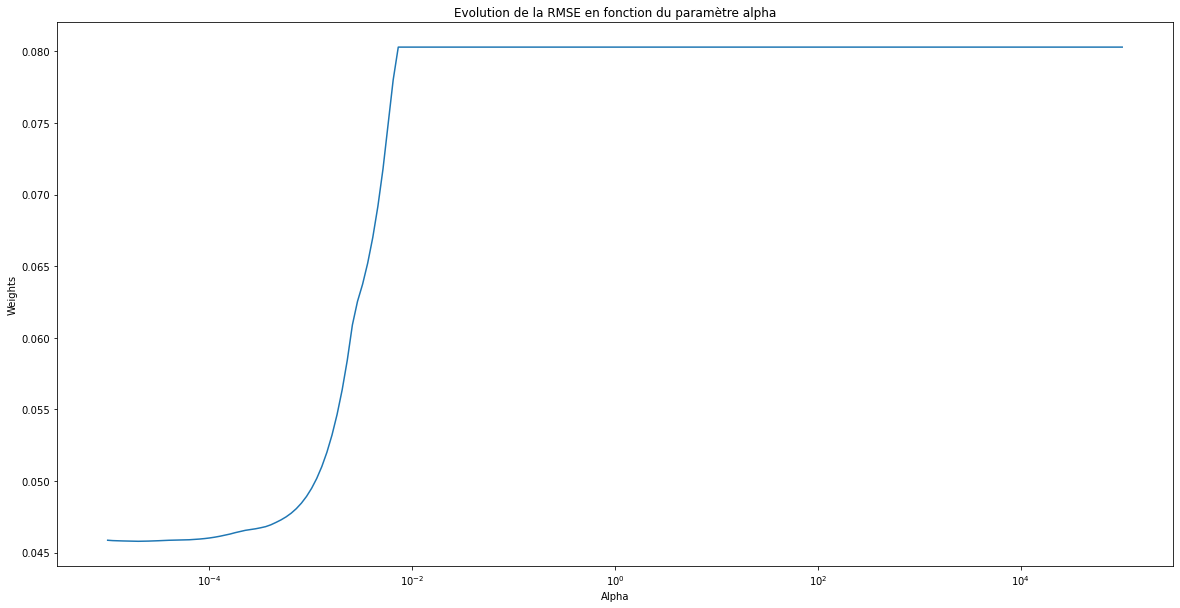

La régresison Lasso la plus performante est atteinte avec le coefficient alpha =  5.672426068491978e-05  avec un r2_score = 0.5084409788548078


In [20]:
plt.figure(figsize=(20,10))
plt.title('Fonction de régularisation des coefficient pour le modèle Lasso', size=20)
plt.plot(alphas, mean_coefs)
plt.xlabel('Alpha', size=10)
plt.xscale('log')
plt.ylabel('Weights', size=10)
plt.show()

plt.figure(figsize=(20,10))
plt.title('Evolution du R2 score en fonction du paramètre alpha')
plt.plot(alphas, mean_r2)
plt.xlabel('Alpha')
plt.xscale('log')
plt.ylabel('Weights')
plt.show()

plt.figure(figsize=(20,10))
plt.title('Evolution de la RMSE en fonction du paramètre alpha')
plt.plot(alphas, mean_rmse)
plt.xlabel('Alpha', size=10)
plt.xscale('log')
plt.ylabel('Weights', size=10)
plt.show()

r2_max = max(np.array(mean_r2)[:,1])
best_alpha = alphas[np.argmax(np.array(mean_r2)[:,1])]
print("La régresison Lasso la plus performante est atteinte avec le coefficient alpha = ",best_alpha, " avec un r2_score =", r2_max)

# Support Vector Regression

In [21]:
from sklearn.svm import SVR

In [22]:
def support_vector_model(x_train_init, x_test_init, y_train_init, y_test_init, tested_features=[], main_features=[], outputs=[]):

    df_r2 = pd.DataFrame()
    
    for elem in main_features:
        tested_features.remove(elem)
    
    for i, col in enumerate(tested_features):
        inputs = [col]
        if len(main_features) > 0:
            inputs += main_features

        # Training and testing set
        x_train, x_test, y_train, y_test = x_train_init[inputs].copy(), x_test_init[inputs].copy(), y_train_init[outputs].copy(), y_test_init[outputs].copy()
    
        # Search best Cross validation fit
        model = SVR()
        parameters = {'kernel':['rbf']}
        clf = GridSearchCV(model, parameters, cv=10) 
        clf.fit(x_train, np.array(y_train).ravel())

        # Indicators 
        y_pred = pd.Series(clf.predict(x_test))
        rmse = np.sqrt(np.sum((y_pred - y_test) ** 2) / len(y_pred))
        r2 = metrics.r2_score(y_test, y_pred)
        r2_error = max(clf.cv_results_['std_test_score'])
        y_pred_positive = np.where(y_pred > -1, y_pred, 0)
        y_test_positive = np.where(y_test > -1, y_test, 0)
        rmsle = np.sqrt(np.sum((np.log(y_pred_positive + 1) \
                             - np.log(y_test_positive + 1)) ** 2) / len(y_pred))

        # Pandas results
        df_r2.loc[i, "Features"] = col
        df_r2.loc[i, "r2"] = round(r2, 2)
        df_r2.loc[i, "r2 error"] = round(r2_error, 2)
        df_r2.loc[i, "RMSE (Normalized)"] = round(rmse.values[0], 4)
        df_r2.loc[i, "RMSLE"] = round(rmsle, 4)

    return df_r2.sort_values("r2", ascending=False).reset_index().drop("index", axis=1), clf

In [23]:
ose_id = ose_2016.copy()

inputs_scaled_ordinal = MinMaxScaler(feature_range=(0,1)).fit_transform(ose_id[inputs_ordinal])
outputs_scaled_ordinal = MinMaxScaler(feature_range=(0,1)).fit_transform(ose_id[outputs_ordinal])

inputs_ordinal_2016 = pd.DataFrame(inputs_scaled_ordinal, columns=inputs_ordinal)
outputs_ordinal_2016 = pd.DataFrame(outputs_scaled_ordinal, columns=outputs_ordinal)

set_2016 = pd.DataFrame()
set_2016[inputs_ordinal] = inputs_ordinal_2016[inputs_ordinal].copy()
set_2016[inputs_nominal] = ose_id[inputs_nominal].copy()
set_2016[outputs_ordinal] = outputs_ordinal_2016[outputs_ordinal].copy()

x_train, x_test, y_train, y_test = train_test_split(set_2016[inputs_ordinal+inputs_nominal], set_2016[outputs_ordinal], test_size=0.2)

In [24]:
df_res, clf_res = support_vector_model(x_train, x_test, y_train, y_test, tested_features=inputs_ordinal[:], main_features=[], outputs=['SiteEnergyUse(kBtu)'])

In [25]:
df_res

,Features,r2,r2 error,RMSE (Normalized),RMSLE
0,LargestPropertyUseTypeGFA,0.03,0.17,0.0,2.4757
1,PropertyGFABuilding(s),0.02,0.18,0.0,2.3600
2,PropertyGFATotal,0.01,0.18,0.0,2.4111
3,NumberofFloors,-0.27,0.15,0.0,2.2083
4,SecondLargestPropertyUseTypeGFA,-0.28,0.19,0.0,2.2908
5,PropertyGFAParking,-0.32,0.20,0.0,2.2914
6,YearBuilt,-0.36,0.11,0.0,2.1493
7,NumberofBuildings,-0.37,0.13,0.0,2.1480
8,ThirdLargestPropertyUseTypeGFA,-0.37,0.18,0.0,2.1848


Le SVM semble très peu applicable à ce problème.

# Random Forest Regressor

## Avec l'ensemble des inputs ordinaux

In [26]:
from sklearn.ensemble import RandomForestRegressor

# inputs : 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType'
#          'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA'
#
#          'PropertyGFATotal'
#
# outputs : 'SiteEnergyUse(kBtu)'

inputs = inputs_ordinal
outputs=['SiteEnergyUse(kBtu)']

r2 = []
coefs = []
rmse = []


x_train, x_test, y_train, y_test = train_test_split(set_2016.loc[:,inputs], set_2016.loc[:,outputs], test_size=0.2)

# Search best Cross validation fit
model = RandomForestRegressor()
parameters = {'n_estimators':[50,100,150], 'max_depth':[3,6,9]}
clf = GridSearchCV(model, parameters, cv=10) 
clf.fit(x_train, np.array(y_train).ravel())
rf = RandomForestRegressor(n_estimators= clf.best_params_['n_estimators'], max_depth=clf.best_params_['max_depth']).fit(x_train, np.array(y_train).ravel())
y_pred = rf.predict(x_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

print('RMSE du Random Forest Regressor : ', rmse)
print('r2 score du Random Forest Regressor : ', r2)


print("Feature importances du Random Forest Regressor")
pd.Series(index=x_train.columns, data=rf.feature_importances_).sort_values()

RMSE du Random Forest Regressor :  0.05571510949707552
r2 score du Random Forest Regressor :  0.6902899585729798
Feature importances du Random Forest Regressor


PropertyGFAParking                 0.006408
ThirdLargestPropertyUseTypeGFA     0.015196
NumberofFloors                     0.016105
SecondLargestPropertyUseTypeGFA    0.018501
NumberofBuildings                  0.019304
YearBuilt                          0.030367
PropertyGFABuilding(s)             0.094008
LargestPropertyUseTypeGFA          0.211327
PropertyGFATotal                   0.588784
dtype: float64

## Avec les inputs ordinaux principaux

In [27]:
# inputs : 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType'
#          'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA'
#
#          'PropertyGFATotal'
#
# outputs : 'SiteEnergyUse(kBtu)'

inputs = ['PropertyGFATotal', 'LargestPropertyUseTypeGFA']
outputs=['SiteEnergyUse(kBtu)']

x_train, x_test, y_train, y_test = train_test_split(set_2016.loc[:,inputs], set_2016.loc[:,outputs], test_size=0.2)

# Search best Cross validation fit
model = RandomForestRegressor()
parameters = {'n_estimators':[50,100,150], 'max_depth':[3,6,9]}
clf = GridSearchCV(model, parameters, cv=10) 
clf.fit(x_train, np.array(y_train).ravel())
rf = RandomForestRegressor(n_estimators= clf.best_params_['n_estimators'], max_depth=clf.best_params_['max_depth']).fit(x_train, np.array(y_train).ravel())
y_pred = rf.predict(x_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

print('RMSE du Random Forest Regressor : ', rmse)
print('r2 score du Random Forest Regressor : ', r2)


print("Feature importances du Random Forest Regressor")
pd.Series(index=x_train.columns, data=rf.feature_importances_).sort_values()

RMSE du Random Forest Regressor :  0.047764061243876055
r2 score du Random Forest Regressor :  0.5306756441449209
Feature importances du Random Forest Regressor


LargestPropertyUseTypeGFA    0.354332
PropertyGFATotal             0.645668
dtype: float64

On obtient ici un très bon modèle, avec un r2 score élevé et une RMSE plus basse que notre base line.

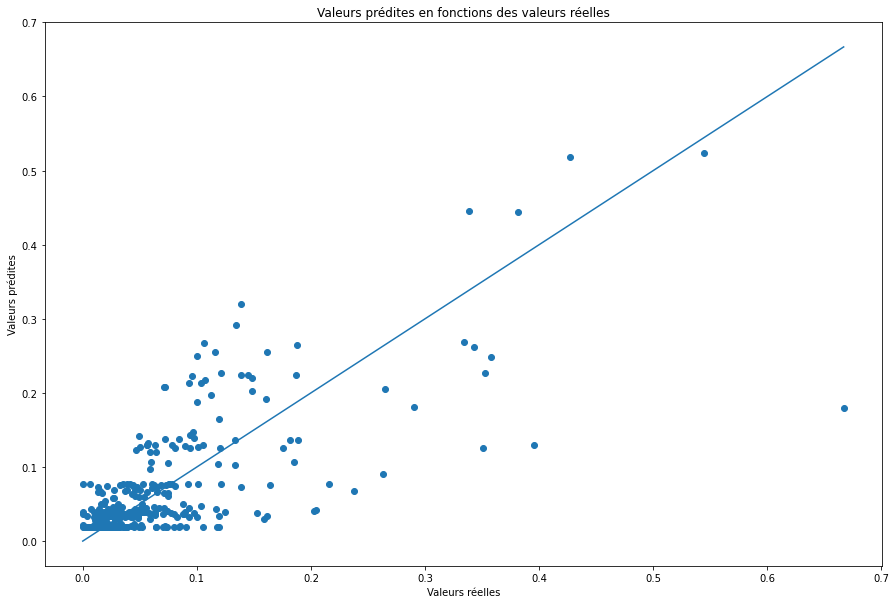

In [28]:
plt.figure(figsize=(15,10))
plt.title('Valeurs prédites en fonctions des valeurs réelles')
plt.scatter(y_test, y_pred)
max_v = max(y_test.max().values[0], y_pred.max())
plt.plot([0, max_v], [0, max_v])
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.show()

# Ajout des features nominales

Grâce à l'analyse ANOVA de nos inputs ordinaux, on a déterminé les features les plus importantes : PrimaryPropertyType et BuildingType

In [29]:
(set_2016.PrimaryPropertyType.value_counts())

Low-Rise Multifamily           836
Mid-Rise Multifamily           399
Small- and Mid-Sized Office    237
Other                          197
Warehouse                      166
Large Office                   133
K-12 School                    121
Mixed Use Property              92
High-Rise Multifamily           76
Retail Store                    75
Worship Facility                62
Hotel                           61
Distribution Center             49
Senior Care Community           33
Supermarket / Grocery Store     27
Self-Storage Facility           26
Medical Office                  26
University                      18
Residence Hall                  14
Refrigerated Warehouse          11
Restaurant                       9
Laboratory                       5
Name: PrimaryPropertyType, dtype: int64

In [30]:
(set_2016.BuildingType.value_counts())

NonResidential          1172
Multifamily LR (1-4)     861
Multifamily MR (5-9)     410
SPS-District K-12         92
Multifamily HR (10+)      77
Nonresidential COS        46
Campus                    15
Name: BuildingType, dtype: int64

## RandomForest nominal / ordinal

In [31]:
inputs_ord = ['PropertyGFATotal', 'LargestPropertyUseTypeGFA']
inputs_nom = ['PrimaryPropertyType']
outputs=['SiteEnergyUse(kBtu)']

set_dumm = set_2016.loc[:,inputs_ord]

for n_type in inputs_nom:
    temp_inp = set_2016[[n_type]].copy()
    top_5 = list(temp_inp[n_type].value_counts().head(6).index)
    temp_inp[~temp_inp[n_type].isin(top_5)] = 'Other'
    dummies = pd.get_dummies(temp_inp[[n_type]])
    set_dumm[dummies.columns] = dummies
    
inputs = set_dumm.columns

set_dumm[outputs] = set_2016.loc[:,outputs]

x_train, x_test, y_train, y_test = train_test_split(set_dumm.loc[:,inputs], set_dumm.loc[:,outputs], test_size=0.2)

# Search best Cross validation fit
model = RandomForestRegressor()
parameters = {'n_estimators':[50,100,150], 'max_depth':[3,6,9]}
clf = GridSearchCV(model, parameters, cv=10) 
clf.fit(x_train, np.array(y_train).ravel())
rf = RandomForestRegressor(n_estimators= clf.best_params_['n_estimators'], max_depth=clf.best_params_['max_depth']).fit(x_train, np.array(y_train).ravel())
y_pred = rf.predict(x_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

print('RMSE du Random Forest Regressor : ', rmse)
print('r2 score du Random Forest Regressor : ', r2)


print("Feature importances du Random Forest Regressor")
pd.Series(index=x_train.columns, data=rf.feature_importances_).sort_values()



RMSE du Random Forest Regressor :  0.046907352157866046
r2 score du Random Forest Regressor :  0.7461817166914742
Feature importances du Random Forest Regressor


PrimaryPropertyType_Low-Rise Multifamily           0.000361
PrimaryPropertyType_Warehouse                      0.000524
PrimaryPropertyType_Small- and Mid-Sized Office    0.001565
PrimaryPropertyType_Large Office                   0.006621
PrimaryPropertyType_Mid-Rise Multifamily           0.006789
PrimaryPropertyType_Other                          0.017924
LargestPropertyUseTypeGFA                          0.261815
PropertyGFATotal                                   0.704401
dtype: float64

## Régression linéaire ordinal / nominal

### 1 nominal

In [32]:
inputs_ord = ['PropertyGFATotal', 'LargestPropertyUseTypeGFA']
inputs_nom = ['PrimaryPropertyType']
outputs=['SiteEnergyUse(kBtu)']

set_dumm = set_2016.loc[:,inputs_ord]

for n_type in inputs_nom:
    temp_inp = set_2016[[n_type]].copy()
    top_5 = list(temp_inp[n_type].value_counts().head(6).index)
    temp_inp[~temp_inp[n_type].isin(top_5)] = 'Other'
    dummies = pd.get_dummies(temp_inp[[n_type]])
    set_dumm[dummies.columns] = dummies
    
inputs = set_dumm.columns

set_dumm[outputs] = set_2016.loc[:,outputs] 
    
# Training and testing set
x_train, x_test, y_train, y_test = train_test_split(set_dumm.loc[:,inputs], set_dumm.loc[:,outputs], test_size=0.2)

# Search best Cross validation fit
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 
              'normalize':[True,False], 
              'copy_X':[True, False]}
clf = GridSearchCV(model, parameters, cv=10) 
clf.fit(x_train, y_train)

# Indicators 
y_pred = clf.predict(x_test)
rmse = np.sqrt(np.sum((y_pred - y_test) ** 2) / len(y_pred))
r2 = metrics.r2_score(y_test, y_pred)
r2_error = max(clf.cv_results_['std_test_score'])
y_pred_positive = np.where(y_pred > -1, y_pred, 0)
y_test_positive = np.where(y_test > -1, y_test, 0)
rmsle = np.sqrt(np.sum((np.log(y_pred_positive + 1) \
                     - np.log(y_test_positive + 1)) ** 2) / len(y_pred))

# Pandas results
df_r2 = pd.DataFrame()
df_r2.loc[0, "r2"] = round(r2, 2)
df_r2.loc[0, "r2 error"] = round(r2_error, 2)
df_r2.loc[0, "RMSE (Normalized)"] = round(rmse.values[0], 4)
df_r2.loc[0, "RMSLE"] = round(rmsle, 4)
df_r2.loc[0, "Train score"] = round(metrics.r2_score(y_train, clf.predict(x_train)), 2)

df_r2.sort_values("r2", ascending=False).reset_index().drop("index", axis=1)

,r2,r2 error,RMSE (Normalized),RMSLE,Train score
0,0.67,0.07,0.0644,0.0482,0.58


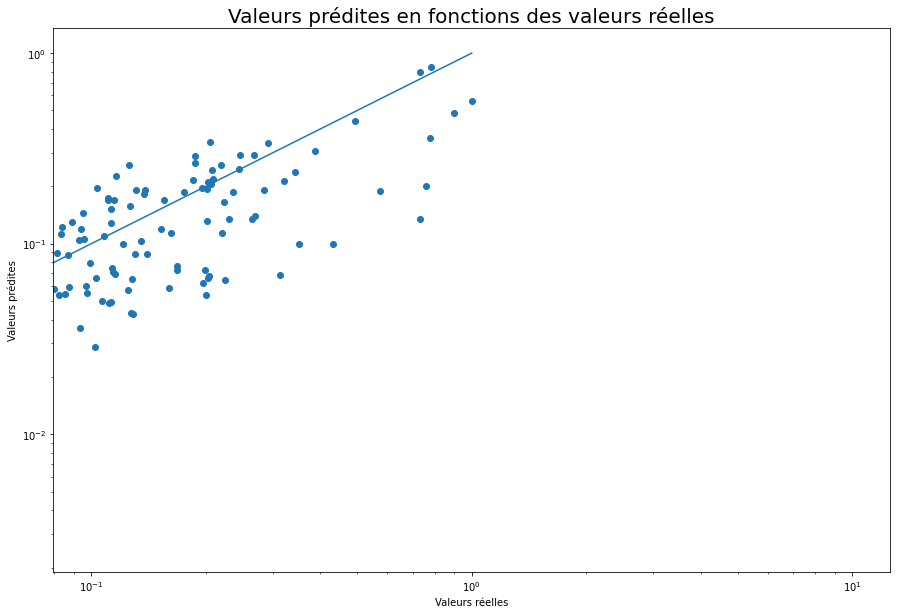

In [33]:
plt.figure(figsize=(15,10))
plt.title('Valeurs prédites en fonctions des valeurs réelles', size=20)
plt.scatter(y_test, y_pred)
max_v = max(y_test.max().values[0], y_pred.max())
plt.plot([0, max_v], [0, max_v])
plt.xlabel('Valeurs réelles')
plt.xscale('log')
plt.ylabel('Valeurs prédites')
plt.yscale('log')
plt.show()

### 2 nominaux

In [34]:
inputs_ord = ['PropertyGFATotal', 'LargestPropertyUseTypeGFA']
inputs_nom = ['PrimaryPropertyType', 'BuildingType']
outputs=['SiteEnergyUse(kBtu)']

set_dumm = set_2016.loc[:,inputs_ord]

for n_type in inputs_nom:
    temp_inp = set_2016[[n_type]].copy()
    top_5 = list(temp_inp[n_type].value_counts().head(6).index)
    temp_inp[~temp_inp[n_type].isin(top_5)] = 'Other'
    dummies = pd.get_dummies(temp_inp[[n_type]])
    set_dumm[dummies.columns] = dummies
    
inputs = set_dumm.columns

set_dumm[outputs] = set_2016.loc[:,outputs] 
    
# Training and testing set
x_train, x_test, y_train, y_test = train_test_split(set_dumm.loc[:,inputs], set_dumm.loc[:,outputs], test_size=0.2)

# Search best Cross validation fit
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 
              'normalize':[True,False], 
              'copy_X':[True, False]}

clf = GridSearchCV(model, parameters, cv=10) 
clf.fit(x_train, y_train)

blr = LinearRegression(fit_intercept=clf.best_params_['fit_intercept'], \
              normalize=clf.best_params_['normalize'], \
              copy_X=clf.best_params_['copy_X'])

blr.fit(x_train, y_train)

# Indicators 
y_pred = blr.predict(x_test)
rmse = np.sqrt(np.sum((y_pred - y_test) ** 2) / len(y_pred))
r2 = metrics.r2_score(y_test, y_pred)
r2_error = max(clf.cv_results_['std_test_score'])
y_pred_positive = np.where(y_pred > -1, y_pred, 0)
y_test_positive = np.where(y_test > -1, y_test, 0)
rmsle = np.sqrt(np.sum((np.log(y_pred_positive + 1) \
                     - np.log(y_test_positive + 1)) ** 2) / len(y_pred))

# Pandas results
df_r2 = pd.DataFrame()
df_r2.loc[0, "r2"] = round(r2, 2)
df_r2.loc[0, "r2 error"] = round(r2_error, 2)
df_r2.loc[0, "RMSE (Normalized)"] = round(rmse.values[0], 4)
df_r2.loc[0, "RMSLE"] = round(rmsle, 4)

df_r2.sort_values("r2", ascending=False).reset_index().drop("index", axis=1)



,r2,r2 error,RMSE (Normalized),RMSLE
0,0.65,0.1,0.0552,0.0428


Feature importances de la Regression Linéaire


Text(0, 0.5, 'Coefficient de corrélation')

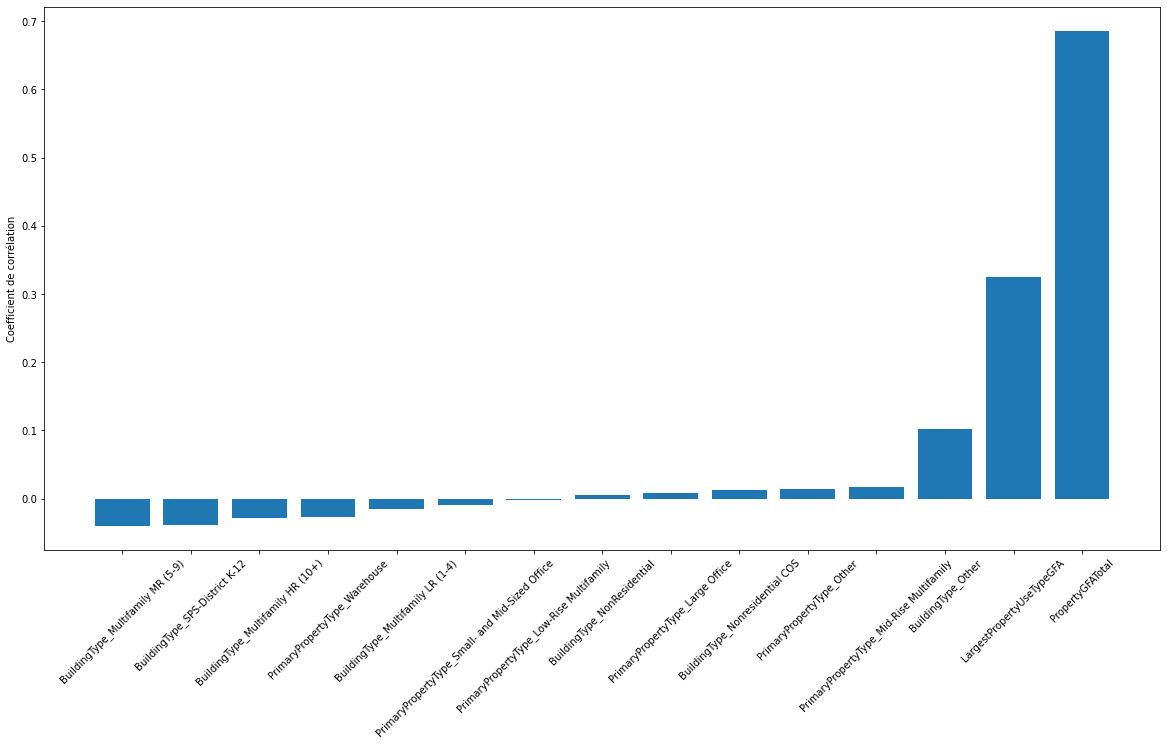

In [35]:
feat_serie = pd.Series(index=x_train.columns, data=blr.coef_[0]).sort_values()

print("Feature importances de la Regression Linéaire")
plt.figure(figsize=(20,10))
plt.bar(feat_serie.index, feat_serie.values)
plt.xticks(rotation=45)
plt.ylabel("Coefficient de corrélation")


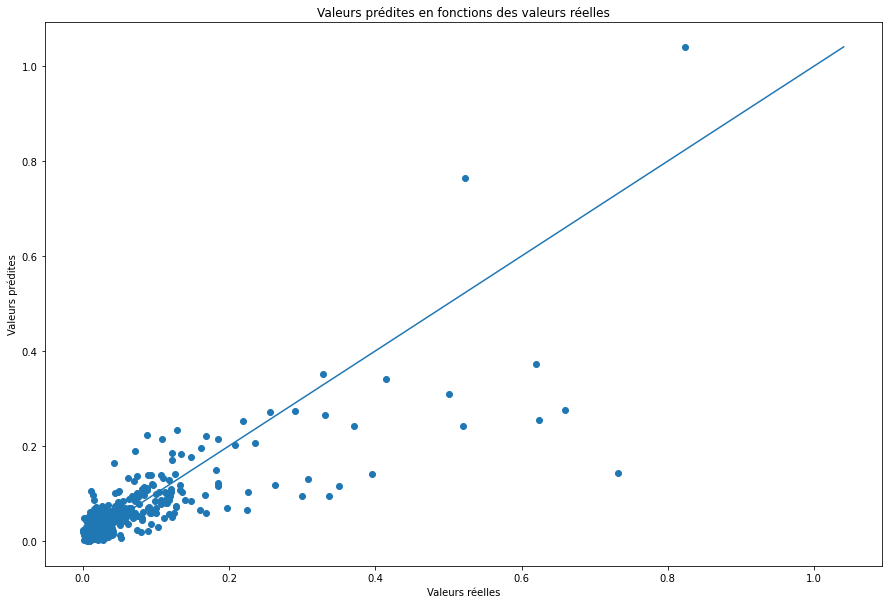

In [36]:
plt.figure(figsize=(15,10))
plt.title('Valeurs prédites en fonctions des valeurs réelles')
plt.scatter(y_test, y_pred)
max_v = max(y_test.max().values[0], y_pred.max())
plt.plot([0, max_v], [0, max_v])
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.show()

In [37]:
set_2016.head()

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,BuildingType,PrimaryPropertyType,ZipCode,CouncilDistrictCode,Neighborhood,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,0.236842,0.037037,0.121212,0.043160,0.000000,0.048685,0.052381,0.000000,0.000000,NonResidential,Hotel,98101.0,7,DOWNTOWN,Hotel,None,None,0.255632,0.257641,0.189689,0.199874,0.099554,0.100855,0.064578,0.065179,0.036801,0.097407,0.190508
1,0.842105,0.037037,0.111111,0.052704,0.029387,0.048728,0.049499,0.034333,0.015208,NonResidential,Hotel,98101.0,7,DOWNTOWN,Hotel,Parking,Restaurant,0.296621,0.299205,0.183037,0.189834,0.115557,0.117187,0.000000,0.053894,0.148336,0.115228,0.192513
2,0.605263,0.037037,0.414141,0.590390,0.383759,0.472946,0.475122,0.000000,0.000000,NonResidential,Hotel,98101.0,7,DOWNTOWN,Hotel,None,None,0.300375,0.298594,0.251429,0.257504,1.000000,1.000000,0.695018,0.796662,0.043067,0.811823,0.147727
3,0.228070,0.037037,0.101010,0.026060,0.000000,0.031540,0.035224,0.000000,0.000000,NonResidential,Hotel,98101.0,7,DOWNTOWN,Hotel,None,None,0.346683,0.346271,0.224717,0.236482,0.093606,0.093956,0.071364,0.046288,0.052218,0.111565,0.313503
4,0.701754,0.037037,0.181818,0.098122,0.120950,0.064585,0.074536,0.155004,0.000000,NonResidential,Hotel,98121.0,7,DOWNTOWN,Hotel,Parking,Swimming Pool,0.359199,0.362775,0.219728,0.227696,0.195250,0.198229,0.000000,0.088008,0.253825,0.196465,0.193850


On cherche maintenant à effectuer des prédictions sur les GHG Emissions.
Comme on l'a observé par l'analyse multivariée, cet output semble un peu corrélés ou dépendant des inputs que les
consommations énergétiques. Ces inputs les plus importants sont les mêmes, on pourra donc appliquer le même modèle.

In [38]:
set_2016.corr().TotalGHGEmissions

YearBuilt                          0.037960
NumberofBuildings                  0.107154
NumberofFloors                     0.337240
PropertyGFATotal                   0.544564
PropertyGFAParking                 0.289860
PropertyGFABuilding(s)             0.551812
LargestPropertyUseTypeGFA          0.563928
SecondLargestPropertyUseTypeGFA    0.317875
ThirdLargestPropertyUseTypeGFA     0.192816
ZipCode                           -0.097401
CouncilDistrictCode                0.116502
SiteEUI(kBtu/sf)                   0.489719
SiteEUIWN(kBtu/sf)                 0.484176
SourceEUI(kBtu/sf)                 0.392227
SourceEUIWN(kBtu/sf)               0.386577
SiteEnergyUse(kBtu)                0.825038
SiteEnergyUseWN(kBtu)              0.825539
SteamUse(kBtu)                     0.620939
Electricity(kBtu)                  0.614720
NaturalGas(kBtu)                   0.758113
TotalGHGEmissions                  1.000000
GHGEmissionsIntensity              0.526471
Name: TotalGHGEmissions, dtype: 

In [39]:
inputs_ord = ['PropertyGFATotal', 'NumberofBuildings']
inputs_nom = ['PrimaryPropertyType']
outputs=['TotalGHGEmissions']

set_dumm = set_2016.loc[:,inputs_ord]

for n_type in inputs_nom:
    temp_inp = set_2016[[n_type]].copy()
    top_5 = list(temp_inp[n_type].value_counts().head(6).index)
    temp_inp[~temp_inp[n_type].isin(top_5)] = 'Other'
    dummies = pd.get_dummies(temp_inp[[n_type]])
    set_dumm[dummies.columns] = dummies
    
inputs = set_dumm.columns

set_dumm[outputs] = set_2016.loc[:,outputs] 
    
# Training and testing set
x_train, x_test, y_train, y_test = train_test_split(set_dumm.loc[:,inputs], set_dumm.loc[:,outputs], test_size=0.2)

# Search best Cross validation fit
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 
              'normalize':[True,False], 
              'copy_X':[True, False]}

clf = GridSearchCV(model, parameters, cv=10) 
clf.fit(x_train, y_train)

blr = LinearRegression(fit_intercept=clf.best_params_['fit_intercept'], \
              normalize=clf.best_params_['normalize'], \
              copy_X=clf.best_params_['copy_X'])

blr.fit(x_train, y_train)

# Indicators 
y_pred = blr.predict(x_test)
rmse = np.sqrt(np.sum((y_pred - y_test) ** 2) / len(y_pred))
r2 = metrics.r2_score(y_test, y_pred)
r2_error = max(clf.cv_results_['std_test_score'])
y_pred_positive = np.where(y_pred > -1, y_pred, 0)
y_test_positive = np.where(y_test > -1, y_test, 0)
rmsle = np.sqrt(np.sum((np.log(y_pred_positive + 1) \
                     - np.log(y_test_positive + 1)) ** 2) / len(y_pred))

# Pandas results
df_r2 = pd.DataFrame()
df_r2.loc[0, "r2"] = round(r2, 2)
df_r2.loc[0, "r2 error"] = round(r2_error, 2)
df_r2.loc[0, "RMSE (Normalized)"] = round(rmse.values[0], 4)
df_r2.loc[0, "RMSLE"] = round(rmsle, 4)

df_r2.sort_values("r2", ascending=False).reset_index().drop("index", axis=1)


,r2,r2 error,RMSE (Normalized),RMSLE
0,0.29,0.13,0.0437,0.0378


In [40]:
x_train, x_test, y_train, y_test = train_test_split(set_2016[inputs_ordinal+inputs_nominal], set_2016[outputs_ordinal], test_size=0.2)
df_res, clf_res = linear_regression_model(x_train, x_test, y_train, y_test, tested_features=inputs_ordinal[:], main_features=[], outputs=['TotalGHGEmissions'])

In [41]:
df_res

,Features,r2,r2 error,RMSE (Normalized),RMSLE,Train score
0,PropertyGFABuilding(s),0.30,0.15,0.0646,0.0498,-1.32
1,PropertyGFATotal,0.29,0.14,0.0653,0.0502,-1.37
2,LargestPropertyUseTypeGFA,0.29,0.13,0.0651,0.0501,-1.09
3,SecondLargestPropertyUseTypeGFA,0.13,0.08,0.0721,0.0568,-9.55
4,NumberofFloors,0.09,0.17,0.0741,0.0583,-6.10
5,PropertyGFAParking,0.08,0.13,0.0744,0.0586,-9.71
6,ThirdLargestPropertyUseTypeGFA,0.05,0.08,0.0755,0.0598,-32.26
7,YearBuilt,-0.00,0.04,0.0775,0.0618,-580.08
8,NumberofBuildings,-0.00,0.11,0.0775,0.0618,-61.37


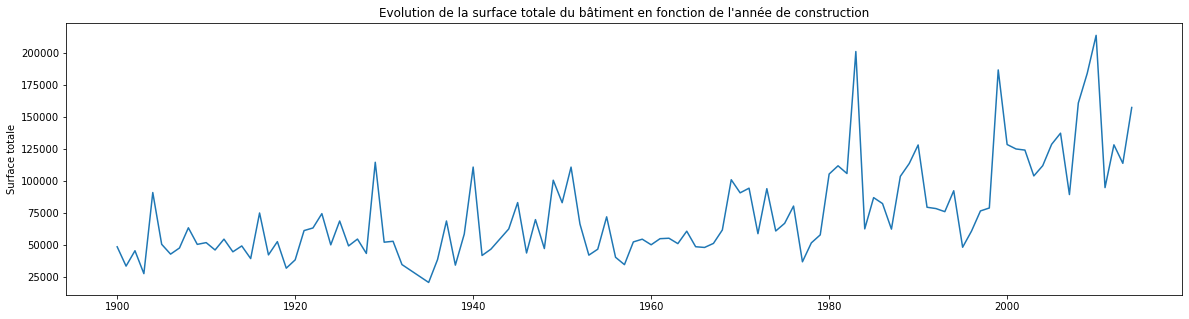

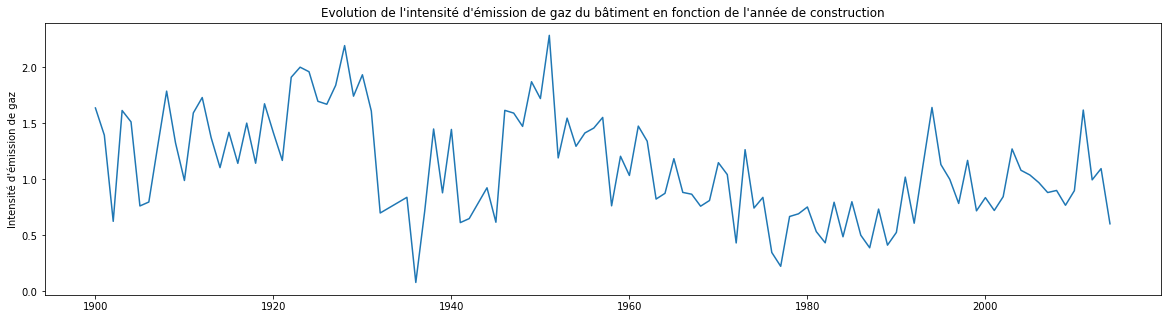

In [42]:
plt.figure(figsize=(20,5))
plt.title("Evolution de la surface totale du bâtiment en fonction de l'année de construction")
plt.plot(ose_2016.groupby('YearBuilt').PropertyGFATotal.mean())
plt.ylabel("Surface totale")
plt.show()

plt.figure(figsize=(20,5))
plt.title("Evolution de l'intensité d'émission de gaz du bâtiment en fonction de l'année de construction")
plt.plot(ose_2016.groupby('YearBuilt')['GHGEmissionsIntensity'].mean())
plt.ylabel("Intensité d'émission de gaz")
plt.show()

In [43]:
ose_2016.corr()['ENERGYSTARScore']

OSEBuildingID                      0.035415
DataYear                                NaN
ZipCode                            0.002076
CouncilDistrictCode                0.074900
Latitude                           0.096692
Longitude                         -0.016341
YearBuilt                         -0.004804
NumberofBuildings                  0.002471
NumberofFloors                     0.047201
PropertyGFATotal                   0.100097
PropertyGFAParking                 0.050697
PropertyGFABuilding(s)             0.103445
LargestPropertyUseTypeGFA          0.091895
SecondLargestPropertyUseTypeGFA    0.118265
ThirdLargestPropertyUseTypeGFA     0.060214
ENERGYSTARScore                    1.000000
SiteEUI(kBtu/sf)                  -0.413599
SiteEUIWN(kBtu/sf)                -0.416443
SourceEUI(kBtu/sf)                -0.411921
SourceEUIWN(kBtu/sf)              -0.419874
SiteEnergyUse(kBtu)               -0.077664
SiteEnergyUseWN(kBtu)             -0.079163
SteamUse(kBtu)                  

In [44]:
ose_id = ose_2016.copy()
ose_id = ose_id.dropna(subset=['ENERGYSTARScore'])

inputs_ordinal += ['ENERGYSTARScore']

inputs_scaled_ordinal = MinMaxScaler(feature_range=(0,1)).fit_transform(ose_id[inputs_ordinal])
outputs_scaled_ordinal = MinMaxScaler(feature_range=(0,1)).fit_transform(ose_id[outputs_ordinal])

inputs_ordinal_2016 = pd.DataFrame(inputs_scaled_ordinal, columns=inputs_ordinal)
outputs_ordinal_2016 = pd.DataFrame(outputs_scaled_ordinal, columns=outputs_ordinal)

set_2016 = pd.DataFrame()
set_2016[inputs_ordinal] = inputs_ordinal_2016[inputs_ordinal].copy()
set_2016[inputs_nominal] = ose_id[inputs_nominal].copy()
set_2016[outputs_ordinal] = outputs_ordinal_2016[outputs_ordinal].copy()

x_train, x_test, y_train, y_test = train_test_split(set_2016[inputs_ordinal+inputs_nominal], set_2016[outputs_ordinal], test_size=0.2)

In [45]:
ose_id.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,None,0.0,None,0.0,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,None,0.0,None,0.0,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,None,0.0,None,0.0,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [46]:
inputs_ord = ['PropertyGFATotal', 'ENERGYSTARScore']
inputs_nom = ['PrimaryPropertyType']
outputs=['SiteEnergyUse(kBtu)']

set_dumm = (set_2016.loc[:,inputs_ord]).dropna()

for n_type in inputs_nom:
    temp_inp = set_2016[[n_type]].copy()
    top_5 = list(temp_inp[n_type].value_counts().head(6).index)
    temp_inp[~temp_inp[n_type].isin(top_5)] = 'Other'
    dummies = pd.get_dummies(temp_inp[[n_type]])
    set_dumm[dummies.columns] = dummies
    
inputs = set_dumm.columns

set_dumm[outputs] = set_2016.loc[:,outputs] 
    
# Training and testing set
x_train, x_test, y_train, y_test = train_test_split(set_dumm.loc[:,inputs], set_dumm.loc[:,outputs], test_size=0.2)

# Search best Cross validation fit
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 
              'normalize':[True,False], 
              'copy_X':[True, False]}
clf = GridSearchCV(model, parameters, cv=10) 
clf.fit(x_train, y_train)

# Indicators 
y_pred = clf.predict(x_test)
rmse = np.sqrt(np.sum((y_pred - y_test) ** 2) / len(y_pred))
r2 = metrics.r2_score(y_test, y_pred)
r2_error = max(clf.cv_results_['std_test_score'])
y_pred_positive = np.where(y_pred > -1, y_pred, 0)
y_test_positive = np.where(y_test > -1, y_test, 0)
rmsle = np.sqrt(np.sum((np.log(y_pred_positive + 1) \
                     - np.log(y_test_positive + 1)) ** 2) / len(y_pred))

# Pandas results
df_r2 = pd.DataFrame()
df_r2.loc[0, "r2"] = round(r2, 2)
df_r2.loc[0, "r2 error"] = round(r2_error, 2)
df_r2.loc[0, "RMSE (Normalized)"] = round(rmse.values[0], 4)
df_r2.loc[0, "RMSLE"] = round(rmsle, 4)

df_r2.sort_values("r2", ascending=False).reset_index().drop("index", axis=1)

,r2,r2 error,RMSE (Normalized),RMSLE
0,0.83,0.08,0.031,0.0269


In [47]:
inputs_ord = ['PropertyGFATotal', 'ENERGYSTARScore']
inputs_nom = ['PrimaryPropertyType']
outputs=['TotalGHGEmissions']

set_dumm = (set_2016.loc[:,inputs_ord]).dropna()

for n_type in inputs_nom:
    temp_inp = set_2016[[n_type]].copy()
    top_5 = list(temp_inp[n_type].value_counts().head(6).index)
    temp_inp[~temp_inp[n_type].isin(top_5)] = 'Other'
    dummies = pd.get_dummies(temp_inp[[n_type]])
    set_dumm[dummies.columns] = dummies
    
inputs = set_dumm.columns

set_dumm[outputs] = set_2016.loc[:,outputs] 
    
# Training and testing set
x_train, x_test, y_train, y_test = train_test_split(set_dumm.loc[:,inputs], set_dumm.loc[:,outputs], test_size=0.2)

# Search best Cross validation fit
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 
              'normalize':[True,False], 
              'copy_X':[True, False]}
clf = GridSearchCV(model, parameters, cv=10) 
clf.fit(x_train, y_train)

# Indicators 
y_pred = clf.predict(x_test)
rmse = np.sqrt(np.sum((y_pred - y_test) ** 2) / len(y_pred))
r2 = metrics.r2_score(y_test, y_pred)
r2_error = max(clf.cv_results_['std_test_score'])
y_pred_positive = np.where(y_pred > -1, y_pred, 0)
y_test_positive = np.where(y_test > -1, y_test, 0)
rmsle = np.sqrt(np.sum((np.log(y_pred_positive + 1) \
                     - np.log(y_test_positive + 1)) ** 2) / len(y_pred))

# Pandas results
df_r2 = pd.DataFrame()
df_r2.loc[0, "r2"] = round(r2, 2)
df_r2.loc[0, "r2 error"] = round(r2_error, 2)
df_r2.loc[0, "RMSE (Normalized)"] = round(rmse.values[0], 4)
df_r2.loc[0, "RMSLE"] = round(rmsle, 4)

df_r2.sort_values("r2", ascending=False).reset_index().drop("index", axis=1)

,r2,r2 error,RMSE (Normalized),RMSLE
0,0.34,0.18,0.0397,0.0347
